In [57]:
import pickle
import random
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

MAX_POLY = 30
PARTITION_COUNT = 10

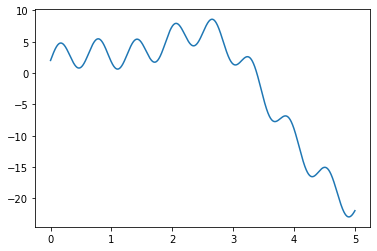

In [58]:
f = open("data.pkl", "rb")
raw = pickle.load(f)
plt.plot(raw[:,0], raw[:,1])
np.random.shuffle(raw)

In [59]:
training_size = len(raw) // 10 * 9
training_set = raw[:training_size]
print(training_set[:5])


[[  0.858        4.81453299]
 [  4.586      -15.74213937]
 [  2.483        6.00657681]
 [  2.469        5.7142762 ]
 [  3.26         2.52689901]]


In [60]:
test_set = raw[training_size:]
print(test_set[:5])

[[  3.101        1.60351572]
 [  3.677       -7.73983239]
 [  0.393        1.35214044]
 [  4.214      -15.73781989]
 [  1.803        2.71560316]]


In [61]:
assert(len(training_set) + len(test_set) == len(raw))

In [62]:
partition_size = len(training_set) // PARTITION_COUNT
print(training_set[:5])

[[  0.858        4.81453299]
 [  4.586      -15.74213937]
 [  2.483        6.00657681]
 [  2.469        5.7142762 ]
 [  3.26         2.52689901]]


In [63]:
test_xs = test_set[:, :1]
test_ys = test_set[:, 1]

degree_vs_bias = np.zeros(shape=(MAX_POLY, 2))

for degree in range(1, MAX_POLY + 1):

    test_poly_xs = np.zeros(shape=(test_set.shape[0], degree))
    for row in range(test_set.shape[0]):
        test_poly_xs[row] = np.concatenate(
            list(test_xs[row] ** i for i in range(1, degree + 1))
        )

    predicted = np.zeros(shape=(test_set.shape[0], PARTITION_COUNT))

    for set_idx in range(PARTITION_COUNT):
        lo = set_idx * partition_size
        hi = (set_idx + 1) * partition_size

        cur_training = training_set[lo:hi]
        train_xs = cur_training[:, :1]
        train_ys = cur_training[:, 1]
        poly = np.zeros(shape=(cur_training.shape[0], degree))
        for row in range(cur_training.shape[0]):
            np.concatenate(
                list(train_xs[row] ** i for i in range(1, degree + 1)), out=poly[row]
            )

        model = linear_model.LinearRegression()

        model.fit(poly, train_ys)

        predicted[:, set_idx] = model.predict(test_poly_xs)
        


    expected_val = np.sum(predicted, axis=1) / PARTITION_COUNT
  
    assert expected_val.shape == test_ys.shape
    degree_vs_bias[degree - 1, 0] = (
        np.sum((expected_val - test_ys) ** 2) / expected_val.shape
    )

    variance = (
        np.sum(
            (predicted - np.repeat(expected_val.reshape(500, 1), 10, axis=1)) ** 2,
            axis=1,
        )
        / PARTITION_COUNT
    )
    variance = np.sum(variance) / test_set.shape[0]
    degree_vs_bias[degree - 1, 1] = variance
    print(
        "degree {} bias = {} variance = {}".format(
            degree, degree_vs_bias[degree - 1][0], degree_vs_bias[degree - 1][1]
        )
    )
    

degree 1 bias = 30.709624982194175 variance = 0.10884842381605273
degree 2 bias = 5.804721749932219 variance = 0.033035399551406955
degree 3 bias = 5.105839291923241 variance = 0.03476722249709326
degree 4 bias = 3.332817852177079 variance = 0.03438482497647364
degree 5 bias = 3.2109469155237793 variance = 0.04321834296527861
degree 6 bias = 2.7270598513214397 variance = 0.03419287160223881
degree 7 bias = 2.6077577807615198 variance = 0.0371760379145317
degree 8 bias = 2.5961398820108093 variance = 0.039283689037100666
degree 9 bias = 2.5771007703403033 variance = 0.044234844071693855
degree 10 bias = 2.5790826731494603 variance = 0.05663869952745421
degree 11 bias = 2.3828136803844298 variance = 0.04808423444807788
degree 12 bias = 2.3831367791356 variance = 0.05462298137662491
degree 13 bias = 2.219223224251409 variance = 0.07622412211404343
degree 14 bias = 2.2109426913204437 variance = 0.08433767671174251
degree 15 bias = 2.2026462543940717 variance = 0.0761374824258388
degree 16 

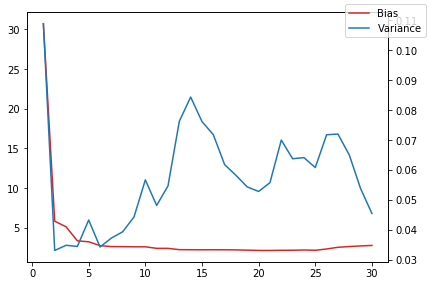

In [64]:
fig, ax1 = plt.subplots()

color = "tab:red"
ax1.plot(list(range(1, MAX_POLY + 1)), degree_vs_bias[:, 0], color=color, label="Bias")
color = "tab:blue"
ax2 = ax1.twinx()
ax2.plot(
    list(range(1, MAX_POLY + 1)), degree_vs_bias[:, 1], color=color, label="Variance"
)
fig.tight_layout()
fig.legend()
plt.show()

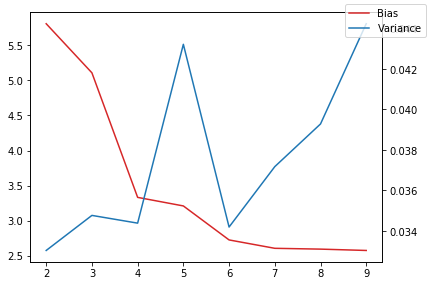

In [65]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(list(range(2, 10)), degree_vs_bias[:,0][1:9], color=color, label='Bias')
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(2,10)), degree_vs_bias[:,1][1:9], color=color, label='Variance')
fig.tight_layout()
fig.legend()
plt.show()

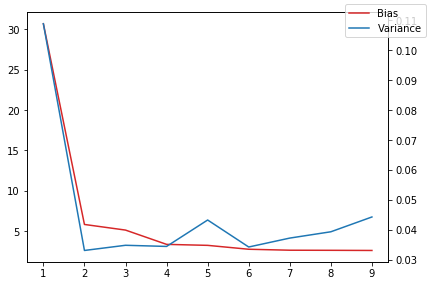

In [66]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(list(range(1, 10)), degree_vs_bias[:,0][0:9], color=color, label='Bias')
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(1,10)), degree_vs_bias[:,1][0:9], color=color, label='Variance')
fig.tight_layout()
fig.legend()
plt.show()